In [1]:
import numpy as np

class gd_pv_2d:
    
    def __init__(self, fn_loss, fn_grad_x1, fn_grad_x2):
        self.fn_loss = fn_loss    # Assign X.fn_loss be the fn_loss
        self.fn_grad_x1 = fn_grad_x1
        self.fn_grad_x2 = fn_grad_x2
        
    def find_min(self, x1_init, x2_init, n_iter, eta, tol):
        #self.x_init = x_init
        #self.n_iter = n_iter
        #self.eta = eta
        #self.tol = tol
        x1 = x1_init
        x2 = x2_init
                
        loss_path = []
        x1_path = []
        x2_path = []
        
        x1_path.append(x1)
        x2_path.append(x2)
        
        loss_this = self.fn_loss(x1,x2)
        loss_path.append(loss_this)
        g1 = self.fn_grad_x1(x1,x2)
        g2 = self.fn_grad_x2(x1,x2)


        
        for i in range(n_iter):
            if abs(g1) < tol and abs(g2) < tol:
                break
            g1 = self.fn_grad_x1(x1,x2)
            g2 = self.fn_grad_x2(x1,x2)
            x1 += -eta * g1
            x2 += -eta * g2
            x1_path.append(x1)
            x2_path.append(x2)
            loss_this = self.fn_loss(x1,x2)
            loss_path.append(loss_this)
            
        self.loss_path = loss_path
        self.x1_path = x1_path
        self.x2_path = x2_path
        self.loss_fn_min = loss_this
        self.x1_at_min = x1
        self.x2_at_min = x2
        self.x1_g = g1
        self.x2_g = g2
        self.number_of_step = len(self.loss_path)

#THREE-HUMP CAMEL FUNCTION
#http://www.sfu.ca/~ssurjano/camel3.html

def fn_loss(x1,x2):
    return (2*x1**2) - (1.05*x1**4)+ (x1**6)/6 + x1*x2 + x2**2



def fn_grad_x1(x1,x2):
    return 4*x1 - 4.2*x1**3 + x1**5 + x2

def fn_grad_x2(x1,x2):
    return (x1 + 2*x2)


In [2]:
#BOOTH FUNCTION
#http://www.sfu.ca/~ssurjano/booth.html
def fn_loss(x1,x2):
    return (x1 + 2*x2 - 7)**2 + (2*x1 + x2 - 5)**2



def fn_grad_x1(x1,x2):
    return 10*x1 + 8*x2 - 34


def fn_grad_x2(x1,x2):
    return (8*x1 + 10*x2 - 38)




In [3]:
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad_x1 = fn_grad_x1 , fn_grad_x2 = fn_grad_x2)

In [4]:
solver.find_min(x1_init = 1,x2_init = 1, n_iter = 100000, eta = 0.01, tol = 1e-10)
print('The minimum of the loss function is {}'.format(np.round(solver.loss_fn_min, 12)))
print('The value of x1 which generates the minimum is {}'.format(np.round(solver.x1_at_min, 7)))
print('The value of x2 which generates the minimum is {}'.format(np.round(solver.x2_at_min, 7)))
print('The number of step is {}'.format(np.round(solver.number_of_step,7)))

The minimum of the loss function is 0.0
The value of x1 which generates the minimum is 1.0
The value of x2 which generates the minimum is 3.0
The number of step is 1177


Text(0.5, 0, 'loss')

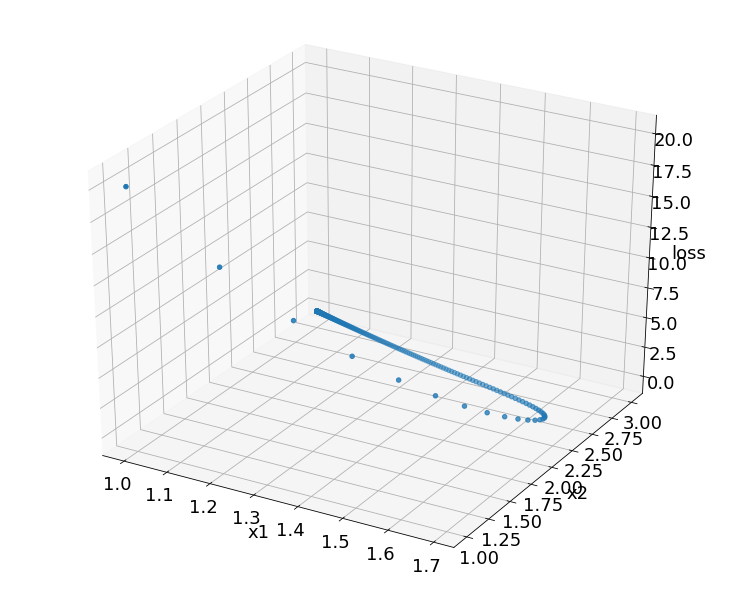

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('loss')


In [8]:
learning_rate = []
number_of_step = []


for j in range(1,1113*2):
    r = j/20000
    solver.find_min(x1_init = 10,x2_init = 10, n_iter = 100000, eta = r, tol = 1e-10)
    learning_rate.append(r)
    number_of_step.append(solver.number_of_step)

    

    

Text(0, 0.5, 'number_of_step')

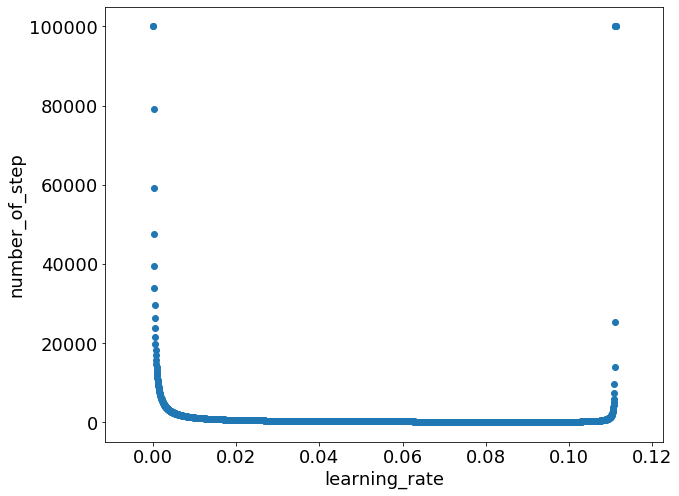

In [9]:
font = {'size': 18}
matplotlib.rc('font', **font)


fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(learning_rate,  number_of_step)
ax1.set_xlabel('learning_rate')
ax1.set_ylabel('number_of_step')